# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [2]:
pip install scipy pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
N = 12
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Gaming'

### Imports

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.special import erfinv
import math

### 1

In [5]:
targetcol = cols[N % 7]
df = pd.read_csv('teen_phone_addiction_dataset.csv')
column_name = targetcol
data = df[column_name].dropna()

In [6]:
mean_val = np.mean(data)
variance_val = np.var(data, ddof=1)
mode_val = stats.mode(data, keepdims=True).mode[0] if len(data) > 0 else np.nan
median_val = np.median(data)
quantiles = np.quantile(data, [0.25, 0.5, 0.75])
kurtosis_val = stats.kurtosis(data)
ass_val = stats.skew(data)
iqr_val = quantiles[2] - quantiles[0]

In [7]:
print("=== Описательные статистики ===")
print(f"Среднее: {mean_val:.4f}")
print(f"Дисперсия: {variance_val:.4f}")
print(f"Мода: {mode_val}")
print(f"Медиана: {median_val:.4f}")
print(f"Квантили [0.25, 0.5, 0.75]: {quantiles}")
print(f"Эксцесс: {kurtosis_val:.4f}")
print(f"Асимметрия: {ass_val:.4f}")
print(f"Интерквартильный размах: {iqr_val:.4f}")

=== Описательные статистики ===
Среднее: 1.5253
Дисперсия: 0.8699
Мода: 0.0
Медиана: 1.5000
Квантили [0.25, 0.5, 0.75]: [0.8 1.5 2.2]
Эксцесс: -0.4994
Асимметрия: 0.2589
Интерквартильный размах: 1.4000


In [8]:
%matplotlib inline

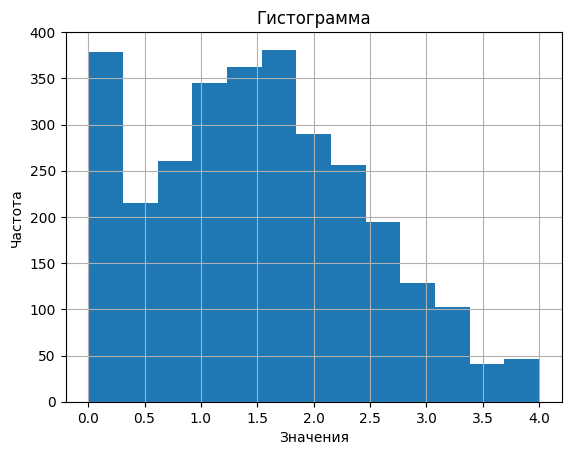

In [9]:
n = len(data)
data.hist(bins=1 + int(1 + int(np.log2(n))))
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.show()

In [10]:
x = np.sort(data)
n = len(x)
y = np.arange(1, n + 1) / n

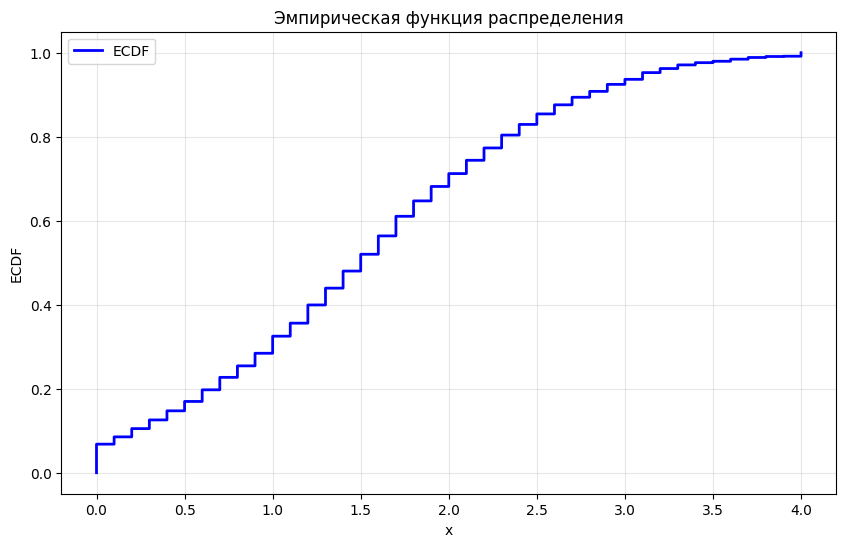

In [11]:
plt.figure(figsize=(10, 6))
plt.step(x, y, where='post', color='blue', linewidth=2, label='ECDF')
plt.xlabel('x')
plt.ylabel('ECDF')
plt.title('Эмпирическая функция распределения')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

- Распределение нормальное (или мб дискретное нулевое)
- мода ноль
- данные не идеальны

### 2

In [12]:
def hihi(data, alpha=0.05):
    n = len(data)
    k = 1 + int(np.log2(n))
    hist_counts, bin_edges = np.histogram(data, bins=k)
    O = hist_counts

    mu = np.mean(data)
    sigma = np.std(data, ddof=1)

    E = np.zeros(k)
    for i in range(k):
        left = bin_edges[i]
        right = bin_edges[i+1]
        cdf_left = 0.5 * (1 + math.erf((left - mu) / (sigma * np.sqrt(2))))
        cdf_right = 0.5 * (1 + math.erf((right - mu) / (sigma * np.sqrt(2))))
        prob = cdf_right - cdf_left
        E[i] = n * prob

    O_new = []
    E_new = []
    i = 0
    while i < len(E):
        if E[i] < 5 and len(E_new) > 0:
            O_new[-1] += O[i]
            E_new[-1] += E[i]
        elif E[i] < 5:
            temp_O = O[i]
            temp_E = E[i]
            i += 1
            while i < len(E) and temp_E < 5:
                temp_O += O[i]
                temp_E += E[i]
                i += 1
            O_new.append(temp_O)
            E_new.append(temp_E)
            continue
        else:
            O_new.append(O[i])
            E_new.append(E[i])
        i += 1

    O = np.array(O_new)
    E = np.array(E_new)
    k_adj = len(O)

    chi2_stat = np.sum((O - E)**2 / E)
    df = k_adj - 1 - 2

    if df <= 0:
        print("мало сепеней свободы")
        return None, None, None

    chi2_crit = stats.chi2.ppf(1 - alpha, df)

    if chi2_stat > chi2_crit:
        conclusion = "не норм"
    else:
        conclusion = "норм"

    return chi2_stat, chi2_crit, conclusion

In [13]:
chi2_stat, chi2_crit, chi2_conclusion = hihi(data)
if chi2_stat is not None:
    print(f"Статистика хихи: {chi2_stat:.4f}")
    print(f"Критическое значение: {chi2_crit:.4f}")
    print(f"Вывод: {chi2_conclusion}")

Статистика хихи: 455.3637
Критическое значение: 16.9190
Вывод: не норм


In [25]:
def skew(data, alpha=0.05):
    n = len(data)
    skew = stats.skew(data)
    kurt = stats.kurtosis(data, fisher=True)

    se_skew = np.sqrt(6*n*(n-1) / ((n-2)*(n+1)*(n+3)))
    se_kurt = np.sqrt(24*n*(n-1)**2 / ((n-2)*(n-3)*(n+1)*(n+3)*(n+5)))

    z_skew = skew / se_skew
    z_kurt = kurt / se_kurt
    z_crit = stats.norm.ppf(1 - alpha/2)

    skew_normal = abs(z_skew) < z_crit
    kurt_normal = abs(z_kurt) < z_crit

    if skew_normal and kurt_normal:
        conclusion = "нормальное"
    else:
        conclusion = "не нормальное"

    return skew, kurt, z_skew, z_kurt, conclusion

In [28]:
zskew, kurt, z_skew, z_kurt, sk_conclusion = skew(data)
print(f"Асимметрия: {zskew:.4f}, z = {z_skew:.4f}")
print(f"Эксцесс: {kurt:.4f}, z = {z_kurt:.4f}")
print(f"Вывод: {sk_conclusion}")

Асимметрия: 0.2589, z = 5.7917
Эксцесс: -0.4994, z = -306.1095
Вывод: не нормальное


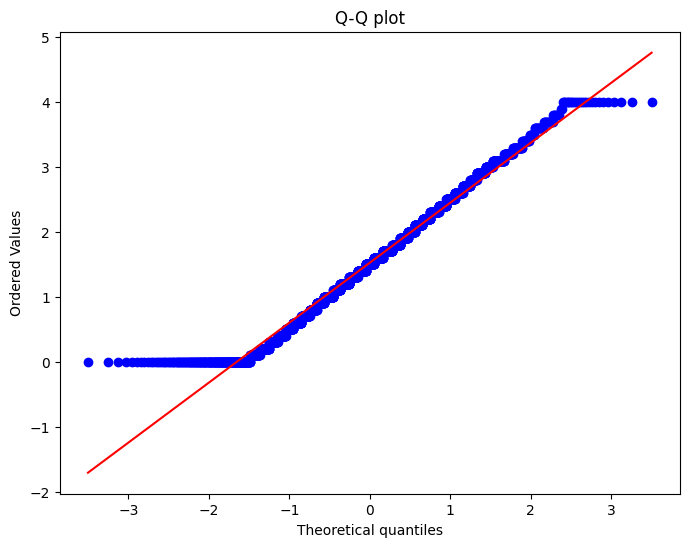

In [29]:
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

Данные не нормальны :3

### 3

In [30]:
values = {val for val in data}
print(sorted(values))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0]


Text(0.5, 1.0, 'После нормировки')

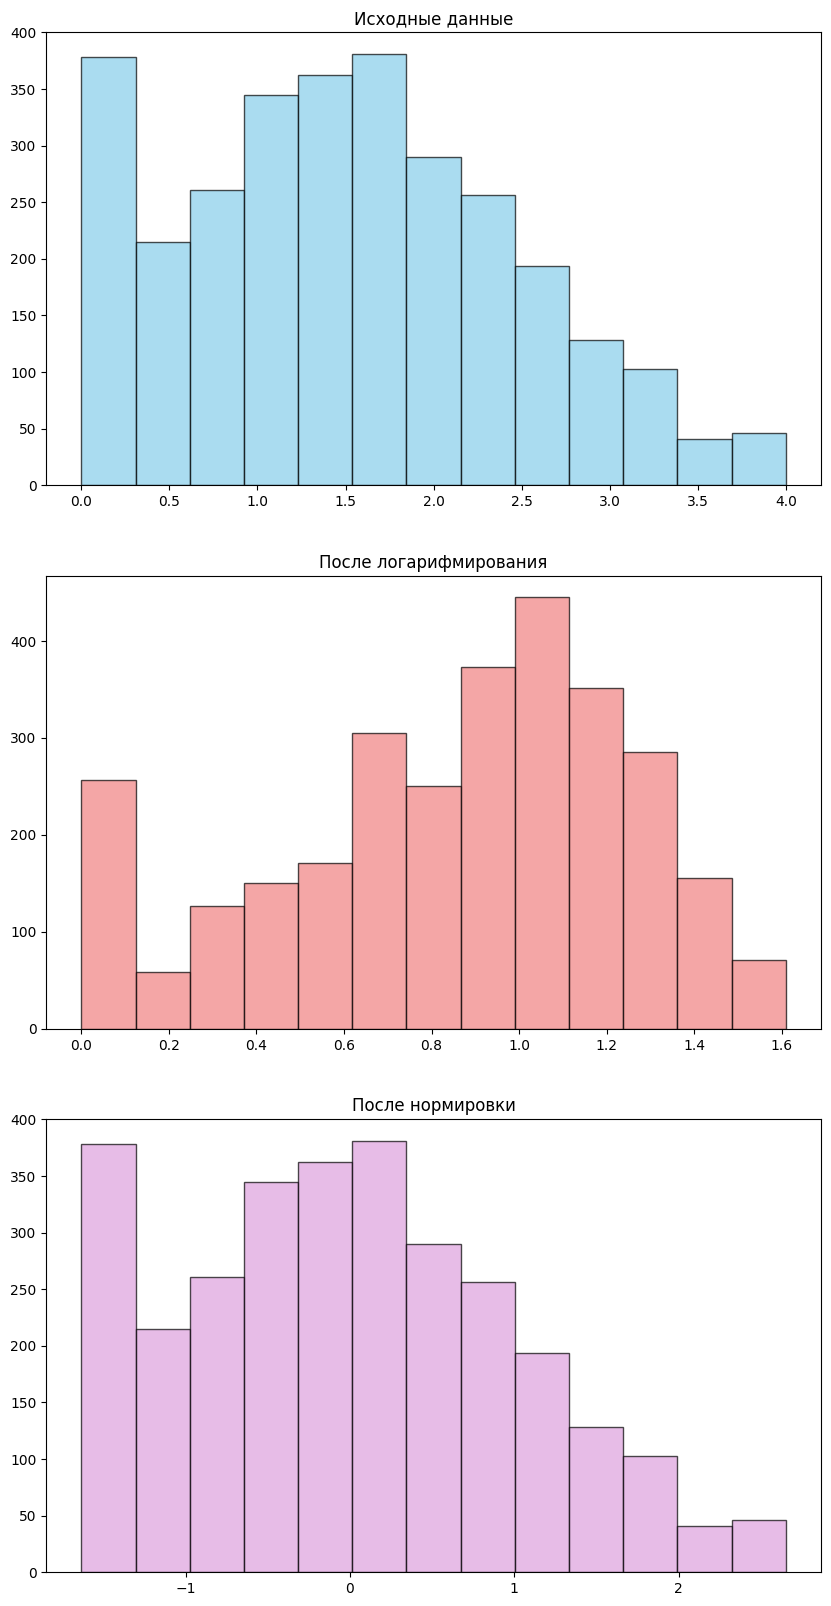

In [31]:
log_transformed = np.log1p(data)
normalized_data = (data - data.mean()) / data.std()
bins=2+int(np.log2(len(data)))


fig, axes = plt.subplots(3, 1, figsize=(10, 20))

axes[0].hist(data, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Исходные данные')

axes[1].hist(log_transformed, bins=bins, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title('После логарифмирования')

axes[2].hist(normalized_data, bins=bins, alpha=0.7, color='plum', edgecolor='black')
axes[2].set_title('После нормировки')

In [32]:
# Рассмотрим логарифмирование
mean_val = np.mean(log_transformed)
variance_val = np.var(log_transformed, ddof=1)
mode_val = stats.mode(log_transformed, keepdims=True).mode[0] if len(data) > 0 else np.nan
median_val = np.median(log_transformed)
quantiles = np.quantile(log_transformed, [0.25, 0.5, 0.75])
kurtosis_val = stats.kurtosis(log_transformed)
ass_val = stats.skew(log_transformed)
iqr_val = quantiles[2] - quantiles[0]

print("=== Описательные статистики ===")
print(f"Среднее: {mean_val:.4f}")
print(f"Дисперсия: {variance_val:.4f}")
print(f"Мода: {mode_val}")
print(f"Медиана: {median_val:.4f}")
print(f"Квантили [0.25, 0.5, 0.75]: {quantiles}")
print(f"Эксцесс: {kurtosis_val:.4f}")
print(f"Асимметрия: {ass_val:.4f}")
print(f"Интерквартильный размах: {iqr_val:.4f}")

=== Описательные статистики ===
Среднее: 0.8502
Дисперсия: 0.1646
Мода: 0.0
Медиана: 0.9163
Квантили [0.25, 0.5, 0.75]: [0.58778666 0.91629073 1.16315081]
Эксцесс: -0.4556
Асимметрия: -0.5255
Интерквартильный размах: 0.5754


In [22]:
chi2_stat, chi2_crit, chi2_conclusion = hihi(log_transformed)
if chi2_stat is not None:
    print(f"Статистика хихи: {chi2_stat:.4f}")
    print(f"Критическое значение: {chi2_crit:.4f}")
    print(f"Вывод: {chi2_conclusion}")

Статистика хихи: 851.6898
Критическое значение: 16.9190
Вывод: не норм


In [33]:
zzskew, kurt, z_skew, z_kurt, sk_conclusion = skew(log_transformed)
print(f"Асимметрия: {zzskew:.4f}, z = {z_skew:.4f}")
print(f"Эксцесс: {kurt:.4f}, z = {z_kurt:.4f}")
print(f"Вывод: {sk_conclusion}")

Асимметрия: -0.5255, z = -11.7553
Эксцесс: -0.4556, z = -279.2572
Вывод: не нормальное


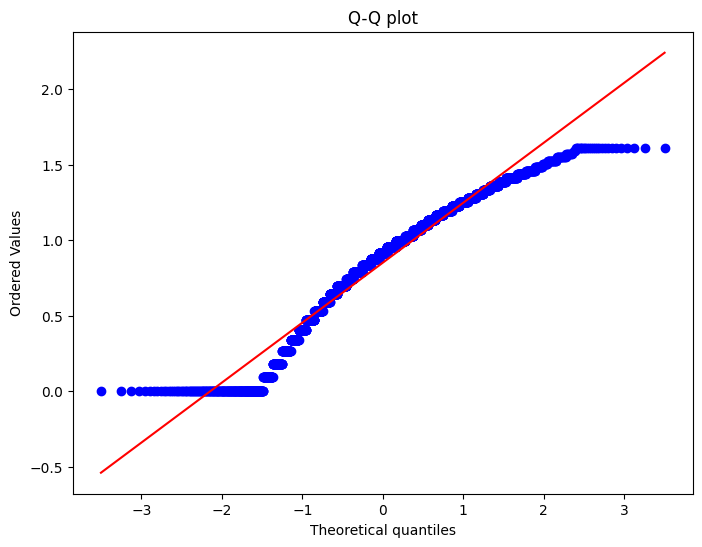

In [35]:
plt.figure(figsize=(8, 6))
stats.probplot(log_transformed, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

Вообще не нормально

### 4

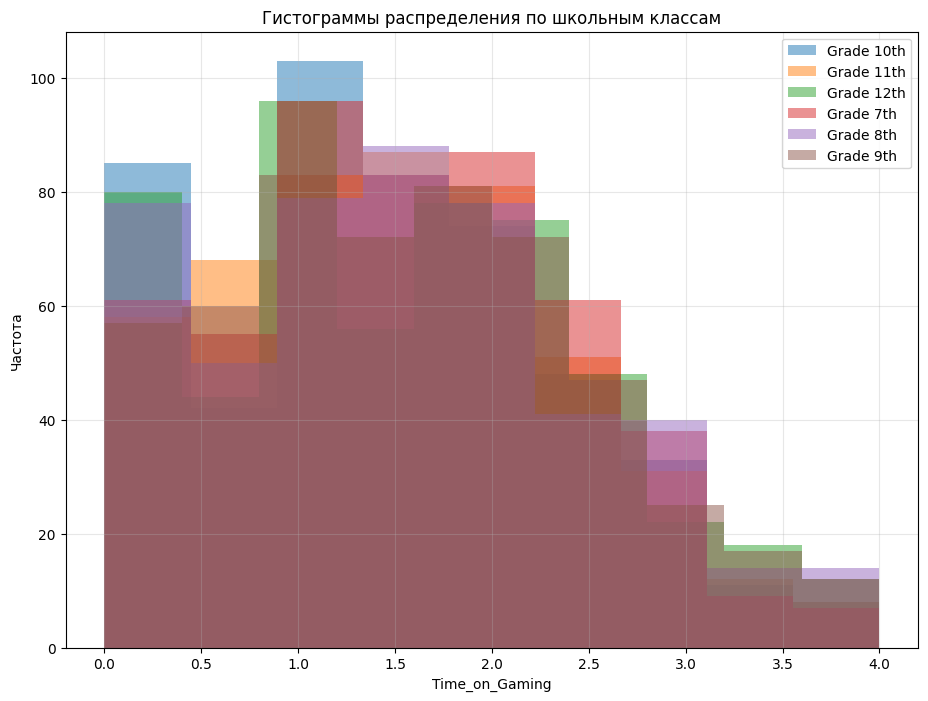

Статистики по группам:
                mean     var  count
School_Grade                       
10th          1.4532  0.8614    487
11th          1.5123  0.7876    479
12th          1.5202  0.9439    529
7th           1.5541  0.7767    497
8th           1.5386  0.9650    482
9th           1.5694  0.8799    526


In [39]:
groups = df.groupby("School_Grade")

plt.figure(figsize=(11, 8))
for grade, subset in groups:
    k = 1 + int(np.log2(len(subset))) 
    plt.hist(subset[cols[N % 7]], bins=k, alpha=0.5, label=f"Grade {grade}")

plt.xlabel(cols[N % 7])
plt.ylabel("Частота")
plt.title("Гистограммы распределения по школьным классам")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

stats_by_grade = groups[cols[N % 7]].agg(['mean', 'var', 'count']).round(4)
print("Статистики по группам:")
print(stats_by_grade)

10 класс больше всех игроки! Дисперсия варьируется от данного класса -> влияет